In [103]:
import urllib.request

print('Beginning file download with urllib2...')

url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"
urllib.request.urlretrieve(url, 'HousePrediction.csv')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
df = pd.read_csv('HousePrediction.csv')

# in order to see some statistics of dataframe
df.describe()
# to see correlation between columns
correl = df.corr()
Corr_with_price = correl['SalePrice']
sorted_correl = correl.sort_values(by = ['SalePrice'])
sorted_correl['SalePrice']
df.MSZoning.value_counts()

Beginning file download with urllib2...


RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [94]:
df.columns                 #listing the data variables (columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [92]:
df                     #Loading the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [93]:
df.describe()                      #To have a quick overview of the data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [76]:
print ('A TABLE SHOWING THE CORRELATION COEFFICIENT AMONG THE VARIABLES')
#finding the correlation among the various columns (variables)
corr_among_columns = df.corr(method ='pearson')

#matching colors for similar correlation coefficients for easy comparison
corr_among_columns.style.background_gradient(cmap='coolwarm')



A TABLE SHOWING THE CORRELATION COEFFICIENT AMONG THE VARIABLES


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.026666,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,

Correlation between Year house was built and Sale Price = 0.5228973328794969


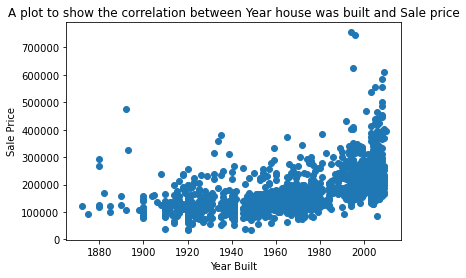

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          2.99e-103
Time:                        17:51:06   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.53e+06   1.16e+05    -21.858      0.0

In [108]:
#reproducing Pearson's Correlation between Year House was built and its respective sale price 
YearBuilt = df["YearBuilt"]
SalePrice = df["SalePrice"]
correlation_between_YearBuilt_SalePrice = YearBuilt.corr(SalePrice)
print('Correlation between Year house was built and Sale Price =' , correlation_between_YearBuilt_SalePrice)


#graphical representation of the correlation between ear House was built and its respective sale price
plt.scatter(YearBuilt, SalePrice) 
plt.title('A plot to show the correlation between Year house was built and Sale price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

#To generate the ordinary least square regression results
res = smf.ols(formula='SalePrice~ YearBuilt', data=df).fit()
print(res.summary())

Correlation between Overall Quality and Sale Price = 0.7909816005838047


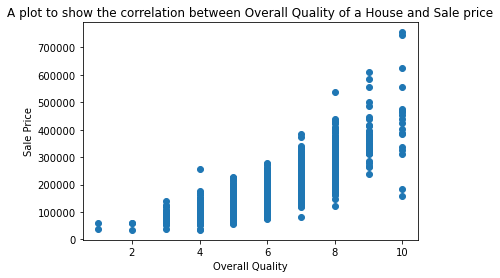

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          2.19e-313
Time:                        17:57:26   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

In [110]:
#reproducing Pearson's Correlation between Overall Quality of a house and its respective Sale Price 
OverallQual = df["OverallQual"]
SalePrice = df["SalePrice"]
correlation_between_OverallQual_SalePrice = OverallQual.corr(SalePrice)
print('Correlation between Overall Quality and Sale Price =' , correlation_between_OverallQual_SalePrice)


#graphical representation of the correlation between Overall Quality of a house and its respective Sale Price
plt.scatter(OverallQual, SalePrice) 
plt.title('A plot to show the correlation between Overall Quality of a House and Sale price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

#To generate the ordinary least square regression results
res = smf.ols(formula='SalePrice~ OverallQual', data=df).fit()
print(res.summary())


Correlation between Great Living Area and Sale Price = 0.7086244776126522


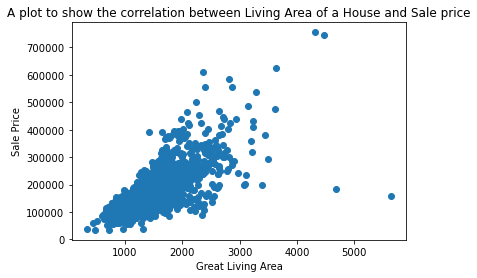

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          4.52e-223
Time:                        17:48:05   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

In [106]:
#reproducing Pearson's Correlation between Living Area of a house and its respective Sale Price 
GrLivArea = df["GrLivArea"]
SalePrice = df["SalePrice"]
correlation_between_GrLivArea_SalePrice = GrLivArea.corr(SalePrice)
print('Correlation between Great Living Area and Sale Price =' , correlation_between_GrLivArea_SalePrice)


#graphical representation of the correlation between Living Area of a house and its respective Sale Price
plt.scatter(GrLivArea, SalePrice) 
plt.title('A plot to show the correlation between Living Area of a House and Sale price')
plt.xlabel('Great Living Area')
plt.ylabel('Sale Price')
plt.show()

#To generate the ordinary least square regression results
res = smf.ols(formula='SalePrice~ GrLivArea', data=df).fit()
print(res.summary())

Correlation between Garage Cars and Sale Price = 0.6404091972583531


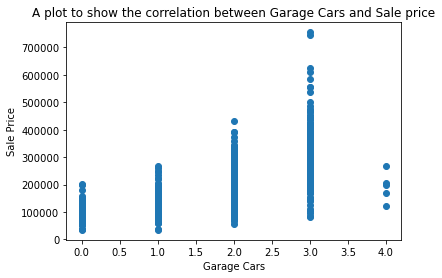

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          2.50e-169
Time:                        18:58:14   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.062e+04   4102.261     14.777      0.0

In [114]:
#reproducing Pearson's Correlation between Garage Cars and its respective Sale Price 
GarageCars = df["GarageCars"]
SalePrice = df["SalePrice"]
correlation_between_GarageCars_SalePrice = GarageCars.corr(SalePrice)
print('Correlation between Garage Cars and Sale Price =' , correlation_between_GarageCars_SalePrice)


#graphical representation of the correlation between Garage Cars and its respective Sale Price
plt.scatter(GarageCars, SalePrice) 
plt.title('A plot to show the correlation between Garage Cars and Sale price')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')
plt.show()

#To generate the ordinary least square regression results
res = smf.ols(formula='SalePrice~ GarageCars', data=df).fit()
print(res.summary())